# CIFAR-10 Autoencoder + Classifier
This notebook demonstrates:
1. Training a convolutional autoencoder on CIFAR-10
2. Using the latent space for classification
3. Visualizing results

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Loading & Visualization

In [2]:
# Data transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5,.5,.5),(.5,.5,.5))
])

# Load datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plane    bird     dog      cat      frog     deer     horse    plane   


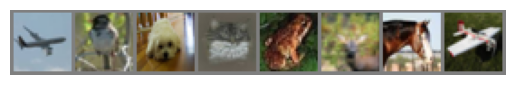

In [3]:
# Visualize sample images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))
print(' '.join(f'{classes[labels[j]]:8s}' for j in range(8)))

## 2. Model Architecture

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder
        self.enc_conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)  # 32x32 -> 16x16
        self.enc_conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)  # 16x16 -> 8x8
        self.enc_conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1) # 8x8 -> 4x4
        
        # Latent space
        self.fc1 = nn.Linear(128*4*4, 256)
        self.fc2 = nn.Linear(256, 32)  # Bottleneck
        
        # Decoder
        self.fc3 = nn.Linear(32, 256)
        self.fc4 = nn.Linear(256, 128*4*4)
        
        self.dec_conv1 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.dec_conv2 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.dec_conv3 = nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1)
    
    def encode(self, x):
        x = F.relu(self.enc_conv1(x))
        x = F.relu(self.enc_conv2(x))
        x = F.relu(self.enc_conv3(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)
    
    def decode(self, z):
        z = F.relu(self.fc3(z))
        z = F.relu(self.fc4(z))
        z = z.view(z.size(0), 128, 4, 4)
        z = F.relu(self.dec_conv1(z))
        z = F.relu(self.dec_conv2(z))
        return torch.tanh(self.dec_conv3(z))
    
    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32, 256)  # Takes latent space as input
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)  # 10 classes
    
    def forward(self, z):
        z = F.relu(self.fc1(z))
        z = F.relu(self.fc2(z))
        return F.log_softmax(self.fc3(z), dim=1)

## 3. Training the Autoencoder

Training Autoencoder...


Epoch 1/100, Loss: 0.0846


Epoch 2/100, Loss: 0.0539


Epoch 3/100, Loss: 0.0499


Epoch 4/100, Loss: 0.0482


Epoch 5/100, Loss: 0.0476


Epoch 6/100, Loss: 0.0471


Epoch 7/100, Loss: 0.0468


Epoch 8/100, Loss: 0.0466


Epoch 9/100, Loss: 0.0463


Epoch 10/100, Loss: 0.0462


Epoch 11/100, Loss: 0.0460


Epoch 12/100, Loss: 0.0458


Epoch 13/100, Loss: 0.0456


Epoch 14/100, Loss: 0.0455


Epoch 15/100, Loss: 0.0454


Epoch 16/100, Loss: 0.0452


Epoch 17/100, Loss: 0.0451


Epoch 18/100, Loss: 0.0450


Epoch 19/100, Loss: 0.0449


Epoch 20/100, Loss: 0.0448


Epoch 21/100, Loss: 0.0446


Epoch 22/100, Loss: 0.0445


Epoch 23/100, Loss: 0.0445


Epoch 24/100, Loss: 0.0444


Epoch 25/100, Loss: 0.0443


Epoch 26/100, Loss: 0.0442


Epoch 27/100, Loss: 0.0441


Epoch 28/100, Loss: 0.0440


Epoch 29/100, Loss: 0.0439


Epoch 30/100, Loss: 0.0439


Epoch 31/100, Loss: 0.0438


Epoch 32/100, Loss: 0.0437


Epoch 33/100, Loss: 0.0436


Epoch 34/100, Loss: 0.0435


Epoch 35/100, Loss: 0.0435


Epoch 36/100, Loss: 0.0434


Epoch 37/100, Loss: 0.0433


Epoch 38/100, Loss: 0.0433


Epoch 39/100, Loss: 0.0432


Epoch 40/100, Loss: 0.0431


Epoch 41/100, Loss: 0.0431


Epoch 42/100, Loss: 0.0430


Epoch 43/100, Loss: 0.0430


Epoch 44/100, Loss: 0.0429


Epoch 45/100, Loss: 0.0428


Epoch 46/100, Loss: 0.0428


Epoch 47/100, Loss: 0.0428


Epoch 48/100, Loss: 0.0427


Epoch 49/100, Loss: 0.0426


Epoch 50/100, Loss: 0.0426


Epoch 51/100, Loss: 0.0425


Epoch 52/100, Loss: 0.0425


Epoch 53/100, Loss: 0.0424


Epoch 54/100, Loss: 0.0424


Epoch 55/100, Loss: 0.0424


Epoch 56/100, Loss: 0.0423


Epoch 57/100, Loss: 0.0423


Epoch 58/100, Loss: 0.0422


Epoch 59/100, Loss: 0.0422


Epoch 60/100, Loss: 0.0422


Epoch 61/100, Loss: 0.0421


Epoch 62/100, Loss: 0.0421


Epoch 63/100, Loss: 0.0420


Epoch 64/100, Loss: 0.0420


Epoch 65/100, Loss: 0.0420


Epoch 66/100, Loss: 0.0419


Epoch 67/100, Loss: 0.0419


Epoch 68/100, Loss: 0.0419


Epoch 69/100, Loss: 0.0418


Epoch 70/100, Loss: 0.0418


Epoch 71/100, Loss: 0.0417


Epoch 72/100, Loss: 0.0417


Epoch 73/100, Loss: 0.0417


Epoch 74/100, Loss: 0.0417


Epoch 75/100, Loss: 0.0417


Epoch 76/100, Loss: 0.0416


Epoch 77/100, Loss: 0.0416


Epoch 78/100, Loss: 0.0415


Epoch 79/100, Loss: 0.0415


Epoch 80/100, Loss: 0.0415


Epoch 81/100, Loss: 0.0414


Epoch 82/100, Loss: 0.0414


Epoch 83/100, Loss: 0.0414


Epoch 84/100, Loss: 0.0414


Epoch 85/100, Loss: 0.0413


Epoch 86/100, Loss: 0.0413


Epoch 87/100, Loss: 0.0413


Epoch 88/100, Loss: 0.0413


Epoch 89/100, Loss: 0.0412


Epoch 90/100, Loss: 0.0412


Epoch 91/100, Loss: 0.0412


Epoch 92/100, Loss: 0.0412


Epoch 93/100, Loss: 0.0411


Epoch 94/100, Loss: 0.0411


Epoch 95/100, Loss: 0.0411


Epoch 96/100, Loss: 0.0410


Epoch 97/100, Loss: 0.0410


Epoch 98/100, Loss: 0.0410


Epoch 99/100, Loss: 0.0410


Epoch 100/100, Loss: 0.0410


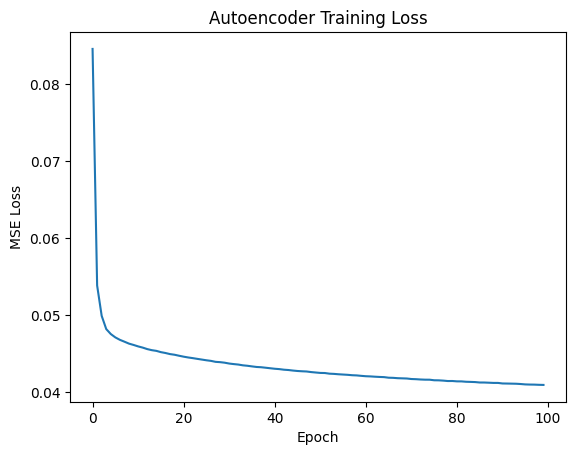

In [5]:
def train_autoencoder(epochs=100):
    autoencoder = Autoencoder()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
    
    losses = []
    
    print("Training Autoencoder...")
    for epoch in range(epochs):
        running_loss = 0.0
        for images, _ in trainloader:
            optimizer.zero_grad()
            outputs = autoencoder(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        epoch_loss = running_loss/len(trainloader)
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    
    # Plot training loss
    plt.plot(losses)
    plt.title('Autoencoder Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.show()
    
    return autoencoder

autoencoder = train_autoencoder()

## 4. Visualizing Autoencoder Results

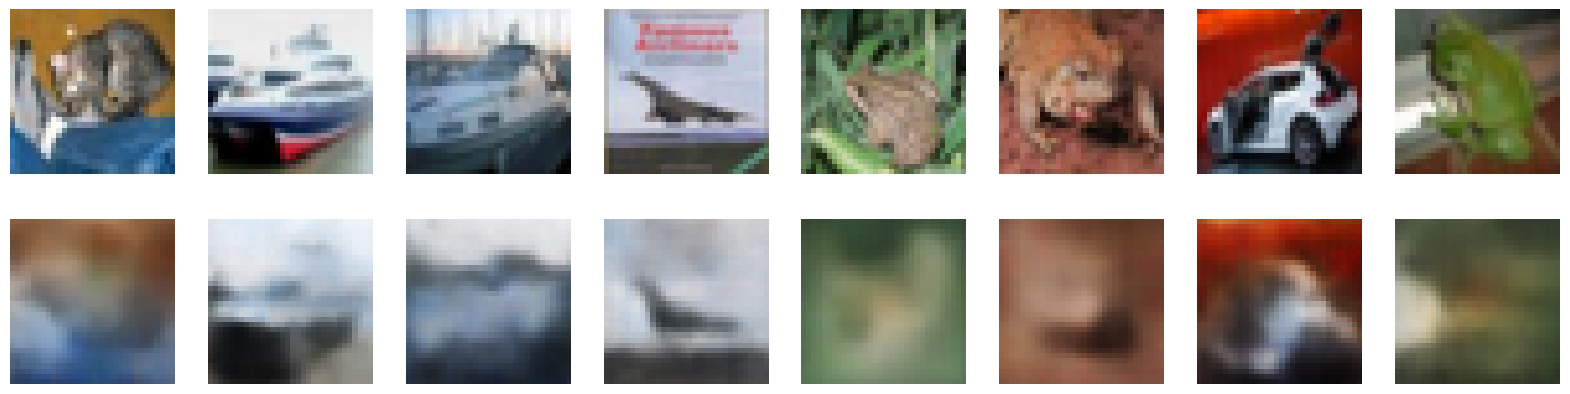

In [6]:
# Test reconstruction
def visualize_reconstructions(model, dataloader, n_images=8):
    model.eval()
    with torch.no_grad():
        images, _ = next(iter(dataloader))
        reconstructions = model(images)
        
        # Denormalize
        images = images / 2 + 0.5
        reconstructions = reconstructions / 2 + 0.5
        
        # Plot
        fig, axes = plt.subplots(2, n_images, figsize=(20, 5))
        for i in range(n_images):
            axes[0,i].imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
            axes[1,i].imshow(np.transpose(reconstructions[i].numpy(), (1, 2, 0)))
            axes[0,i].axis('off')
            axes[1,i].axis('off')
        axes[0,0].set_ylabel('Original')
        axes[1,0].set_ylabel('Reconstructed')
        plt.show()

visualize_reconstructions(autoencoder, testloader)

## 5. Training the Classifier


Training Classifier...


Epoch 1/100, Loss: 1.6271, Accuracy: 42.44%


Epoch 2/100, Loss: 1.4284, Accuracy: 49.78%


Epoch 3/100, Loss: 1.3588, Accuracy: 51.81%


Epoch 4/100, Loss: 1.3063, Accuracy: 53.69%


Epoch 5/100, Loss: 1.2675, Accuracy: 55.11%


Epoch 6/100, Loss: 1.2323, Accuracy: 56.23%


Epoch 7/100, Loss: 1.2012, Accuracy: 57.51%


Epoch 8/100, Loss: 1.1746, Accuracy: 58.33%


Epoch 9/100, Loss: 1.1496, Accuracy: 59.19%


Epoch 10/100, Loss: 1.1243, Accuracy: 60.06%


Epoch 11/100, Loss: 1.1011, Accuracy: 61.04%


Epoch 12/100, Loss: 1.0792, Accuracy: 61.74%


Epoch 13/100, Loss: 1.0606, Accuracy: 62.28%


Epoch 14/100, Loss: 1.0417, Accuracy: 63.10%


Epoch 15/100, Loss: 1.0221, Accuracy: 63.73%


Epoch 16/100, Loss: 1.0034, Accuracy: 64.43%


Epoch 17/100, Loss: 0.9867, Accuracy: 65.03%


Epoch 18/100, Loss: 0.9703, Accuracy: 65.54%


Epoch 19/100, Loss: 0.9551, Accuracy: 66.23%


Epoch 20/100, Loss: 0.9410, Accuracy: 66.63%


Epoch 21/100, Loss: 0.9247, Accuracy: 67.20%


Epoch 22/100, Loss: 0.9112, Accuracy: 67.67%


Epoch 23/100, Loss: 0.8989, Accuracy: 68.11%


Epoch 24/100, Loss: 0.8858, Accuracy: 68.64%


Epoch 25/100, Loss: 0.8730, Accuracy: 68.87%


Epoch 26/100, Loss: 0.8638, Accuracy: 69.48%


Epoch 27/100, Loss: 0.8504, Accuracy: 69.86%


Epoch 28/100, Loss: 0.8406, Accuracy: 69.99%


Epoch 29/100, Loss: 0.8253, Accuracy: 70.71%


Epoch 30/100, Loss: 0.8178, Accuracy: 70.81%


Epoch 31/100, Loss: 0.8104, Accuracy: 71.20%


Epoch 32/100, Loss: 0.7977, Accuracy: 71.76%


Epoch 33/100, Loss: 0.7890, Accuracy: 72.04%


Epoch 34/100, Loss: 0.7793, Accuracy: 72.30%


Epoch 35/100, Loss: 0.7708, Accuracy: 72.54%


Epoch 36/100, Loss: 0.7618, Accuracy: 73.02%


Epoch 37/100, Loss: 0.7556, Accuracy: 72.92%


Epoch 38/100, Loss: 0.7477, Accuracy: 73.33%


Epoch 39/100, Loss: 0.7379, Accuracy: 73.64%


Epoch 40/100, Loss: 0.7307, Accuracy: 74.04%


Epoch 41/100, Loss: 0.7220, Accuracy: 74.24%


Epoch 42/100, Loss: 0.7142, Accuracy: 74.51%


Epoch 43/100, Loss: 0.7089, Accuracy: 74.78%


Epoch 44/100, Loss: 0.7023, Accuracy: 75.02%


Epoch 45/100, Loss: 0.6938, Accuracy: 75.26%


Epoch 46/100, Loss: 0.6867, Accuracy: 75.46%


Epoch 47/100, Loss: 0.6817, Accuracy: 75.65%


Epoch 48/100, Loss: 0.6783, Accuracy: 75.73%


Epoch 49/100, Loss: 0.6664, Accuracy: 76.27%


Epoch 50/100, Loss: 0.6667, Accuracy: 76.11%


Epoch 51/100, Loss: 0.6607, Accuracy: 76.25%


Epoch 52/100, Loss: 0.6505, Accuracy: 76.72%


Epoch 53/100, Loss: 0.6480, Accuracy: 76.81%


Epoch 54/100, Loss: 0.6437, Accuracy: 76.78%


Epoch 55/100, Loss: 0.6386, Accuracy: 77.15%


Epoch 56/100, Loss: 0.6306, Accuracy: 77.47%


Epoch 57/100, Loss: 0.6265, Accuracy: 77.59%


Epoch 58/100, Loss: 0.6207, Accuracy: 77.83%


Epoch 59/100, Loss: 0.6160, Accuracy: 78.09%


Epoch 60/100, Loss: 0.6100, Accuracy: 78.11%


Epoch 61/100, Loss: 0.6080, Accuracy: 78.38%


Epoch 62/100, Loss: 0.6034, Accuracy: 78.37%


Epoch 63/100, Loss: 0.5996, Accuracy: 78.55%


Epoch 64/100, Loss: 0.5908, Accuracy: 78.83%


Epoch 65/100, Loss: 0.5929, Accuracy: 78.65%


Epoch 66/100, Loss: 0.5838, Accuracy: 78.88%


Epoch 67/100, Loss: 0.5817, Accuracy: 79.19%


Epoch 68/100, Loss: 0.5759, Accuracy: 79.25%


Epoch 69/100, Loss: 0.5699, Accuracy: 79.51%


Epoch 70/100, Loss: 0.5705, Accuracy: 79.44%


Epoch 71/100, Loss: 0.5634, Accuracy: 79.70%


Epoch 72/100, Loss: 0.5644, Accuracy: 79.79%


Epoch 73/100, Loss: 0.5560, Accuracy: 80.14%


Epoch 74/100, Loss: 0.5532, Accuracy: 79.95%


Epoch 75/100, Loss: 0.5499, Accuracy: 80.31%


Epoch 76/100, Loss: 0.5439, Accuracy: 80.42%


Epoch 77/100, Loss: 0.5418, Accuracy: 80.44%


Epoch 78/100, Loss: 0.5382, Accuracy: 80.55%


Epoch 79/100, Loss: 0.5398, Accuracy: 80.42%


Epoch 80/100, Loss: 0.5324, Accuracy: 80.80%


Epoch 81/100, Loss: 0.5303, Accuracy: 80.84%


Epoch 82/100, Loss: 0.5308, Accuracy: 80.66%


Epoch 83/100, Loss: 0.5206, Accuracy: 81.20%


Epoch 84/100, Loss: 0.5199, Accuracy: 81.15%


Epoch 85/100, Loss: 0.5130, Accuracy: 81.55%


Epoch 86/100, Loss: 0.5134, Accuracy: 81.47%


Epoch 87/100, Loss: 0.5096, Accuracy: 81.61%


Epoch 88/100, Loss: 0.5040, Accuracy: 81.90%


Epoch 89/100, Loss: 0.5021, Accuracy: 81.96%


Epoch 90/100, Loss: 0.5024, Accuracy: 81.85%


Epoch 91/100, Loss: 0.5009, Accuracy: 81.84%


Epoch 92/100, Loss: 0.4947, Accuracy: 82.20%


Epoch 93/100, Loss: 0.4911, Accuracy: 82.21%


Epoch 94/100, Loss: 0.4900, Accuracy: 82.32%


Epoch 95/100, Loss: 0.4881, Accuracy: 82.23%


Epoch 96/100, Loss: 0.4855, Accuracy: 82.32%


Epoch 97/100, Loss: 0.4805, Accuracy: 82.53%


Epoch 98/100, Loss: 0.4826, Accuracy: 82.47%


Epoch 99/100, Loss: 0.4749, Accuracy: 82.72%


Epoch 100/100, Loss: 0.4738, Accuracy: 82.89%


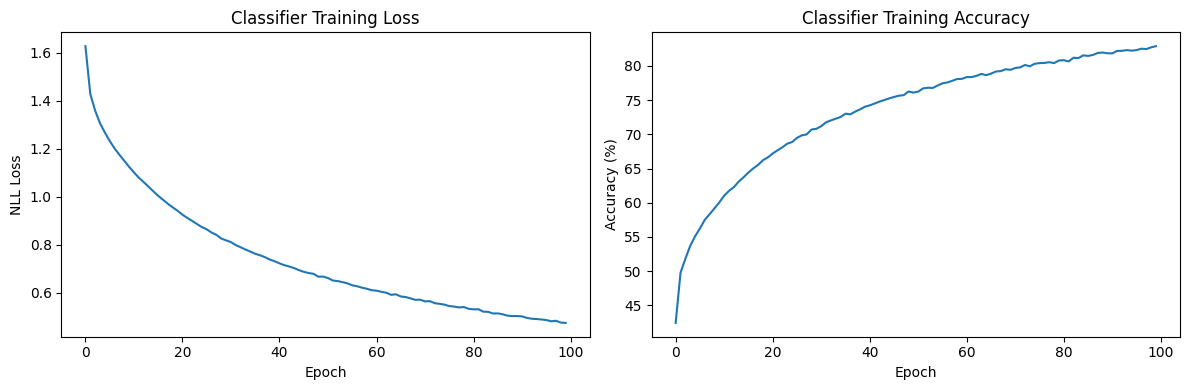

In [7]:
def train_classifier(autoencoder, epochs=100):
    # Freeze autoencoder weights
    for param in autoencoder.parameters():
        param.requires_grad = False
    
    classifier = Classifier()
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(classifier.parameters(), lr=0.001)
    
    losses = []
    accuracies = []
    
    print("\nTraining Classifier...")
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in trainloader:
            optimizer.zero_grad()
            
            with torch.no_grad():
                latent = autoencoder.encode(images)
            
            outputs = classifier(latent)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss/len(trainloader)
        epoch_acc = 100 * correct / total
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(losses)
    ax1.set_title('Classifier Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('NLL Loss')
    
    ax2.plot(accuracies)
    ax2.set_title('Classifier Training Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    
    plt.tight_layout()
    plt.show()
    
    return classifier

classifier = train_classifier(autoencoder)

## 6. Final Evaluation

In [8]:
def evaluate_model(autoencoder, classifier, dataloader):
    autoencoder.eval()
    classifier.eval()
    
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in dataloader:
            latent = autoencoder.encode(images)
            outputs = classifier(latent)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

test_accuracy = evaluate_model(autoencoder, classifier, testloader)

Test Accuracy: 47.01%


## 7. Latent Space Visualization (Optional)

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns

def visualize_latent_space(autoencoder, dataloader, n_samples=1000):
    autoencoder.eval()
    
    # Get latent vectors and labels
    latents = []
    labels_list = []
    
    with torch.no_grad():
        for i, (images, labels) in enumerate(dataloader):
            if i * len(images) >= n_samples:
                break
            latent = autoencoder.encode(images)
            latents.append(latent)
            labels_list.append(labels)
    
    latents = torch.cat(latents)[:n_samples]
    labels = torch.cat(labels_list)[:n_samples]
    
    # Reduce dimensionality
    tsne = TSNE(n_components=2, random_state=42)
    latent_2d = tsne.fit_transform(latents.numpy())
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=latent_2d[:, 0], y=latent_2d[:, 1],
        hue=[classes[label] for label in labels],
        palette=sns.color_palette("hls", 10),
        legend="full",
        alpha=0.7
    )
    plt.title('Latent Space Visualization (t-SNE)')
    plt.show()

# Warning: This may take several minutes to run
# visualize_latent_space(autoencoder, testloader)